| Problem | Formula|Search Domain|
|---      |----    |----|
|VU1|${\text{Min}}={\begin{cases}f_{1}\left(x_1, x_2\right)=\frac{1}{x^2_1+x^2_2+1}\\f_{2}\left(x_1, x_2\right)={x^2_1+3x^2_2+1}\end{cases}}$|$-3\leq{x_1,x_2}\leq3$|
|VU2|${\text{Min}}={\begin{cases}f_{1}\left(x_1, x_2\right)=x_1+x_2+1\\f_{2}\left(x_1, x_2\right)={x^2_1+2x^2_2-1}\end{cases}}$|$-3\leq{x_1,x_2}\leq3$ |

In [52]:
import time 
import xlsxwriter
from pymoo.indicators.hv import Hypervolume
from pymoo.factory import get_performance_indicator
from pymoo.indicators.igd_plus import IGDPlus
import sys,os 
from PIL import Image               # to load images
from IPython.display import display # to display images
import pandas as pd 
ref_point = None
pf = None
def calculate_hv(result):
    path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),result['path'])
    F = np.loadtxt(path)
    metric = Hypervolume(nds=True,ref_point = ref_point,norm_ref_point=False)
    igd_plus = IGDPlus(pf,zero_to_one=False)
    start_time = time.time()
    hv = metric.do(F)
    igd_plus = igd_plus.do(F)
    exc_time = time.time() - start_time
    return [hv,igd_plus,exc_time]
def hv_result(result):
    get = result.apply(calculate_hv, axis=1)
    nadir_arr  = np.array([np.fromstring(i[1:-1],dtype=float, sep=' ') for i in np.array(result['approx_nadir'])])
    df = pd.DataFrame(get.tolist(), columns = ['hv','igd_plus','hv_exc_time'])
    final_result = pd.concat([result, df],axis=1)

    final_result.loc[:,'nadir_point'] =  list(nadir_arr)
    final_result.loc[:,'ref_point'] = str(ref_point)

    output_result = final_result[['Problem', 'Alg_name', 'Evaluations','Iteration', 
    'Objectives', 'n_variables','hv','igd_plus','pop_size','solutions_shape',
    'nadir_point','ref_point',
    'exec_time', 
    'hv_exc_time', 'path', 'image_location']]
    print(f'ref_point is {ref_point}')
    output_result = output_result.sort_values(['Alg_name','Evaluations','igd_plus','hv'],ascending =False).reset_index(drop=True)
    return output_result
cdir =os.getcwd()
pd.set_option('display.float_format', lambda x : "%.7f" % x)

# Kursawe problem 
## - (#variables / #objectives)
## - vu1 2/2
## - vu2 2/2
 - `#PBS -l ncpus=4,mem=16GB`
 - `#PBS -l walltime=10:00:00`
 - `#PBS -q normal`

## Parameter list 
- do for a in nsga2 nsga3 agnomen rnsga2 `algorithm list`
- do for n_gen in 100 200 500 1000    `iterations`
- do for pop in 40 100 200            `population size`

In [53]:
import pandas as pd 
import numpy as np, os ,sys 
from matplotlib import pyplot as plt 

pd.set_option('display.max_rows', None)
folder = os.path.dirname(os.getcwd())
filename = 'result_PI'
path = os.path.join(folder, filename)

result = pd.read_csv(path)

result = result.drop(columns=['xl','xu'])
result = result.loc[(result['Problem']=='VU1' )| (result['Problem']=='VU2') ].reset_index(drop=True)

print(f"The number of records {len(result)}")

The number of records 144


In [54]:
#path and image path indicating location of objective file and visualization file
result.iloc[:,-2:].head(5)

,path,image_location
0,Result/VU1/NSGA2_VU1_2/VU1_NSGA2_Iteration-75_...,Result/Images/VU1/NSGA2_VU1Var-2/VU1_NSGA2_Ite...
1,Result/VU1/NSGA2_VU1_2/VU1_NSGA2_Iteration-25_...,Result/Images/VU1/NSGA2_VU1Var-2/VU1_NSGA2_Ite...
2,Result/VU1/NSGA2_VU1_2/VU1_NSGA2_Iteration-30_...,Result/Images/VU1/NSGA2_VU1Var-2/VU1_NSGA2_Ite...
3,Result/VU1/NSGA2_VU1_2/VU1_NSGA2_Iteration-50_...,Result/Images/VU1/NSGA2_VU1Var-2/VU1_NSGA2_Ite...
4,Result/VU1/NSGA2_VU1_2/VU1_NSGA2_Iteration-15_...,Result/Images/VU1/NSGA2_VU1Var-2/VU1_NSGA2_Ite...


In [55]:
vu1 = result.loc[result['Problem']=='VU1'].reset_index(drop=True)
vu2 = result.loc[result['Problem']=='VU2'].reset_index(drop=True)

# VU1 

In [56]:
folder_2 = os.path.dirname(folder)
folder_2

'/Users/wuyoscar/Documents/Project/MOOP'

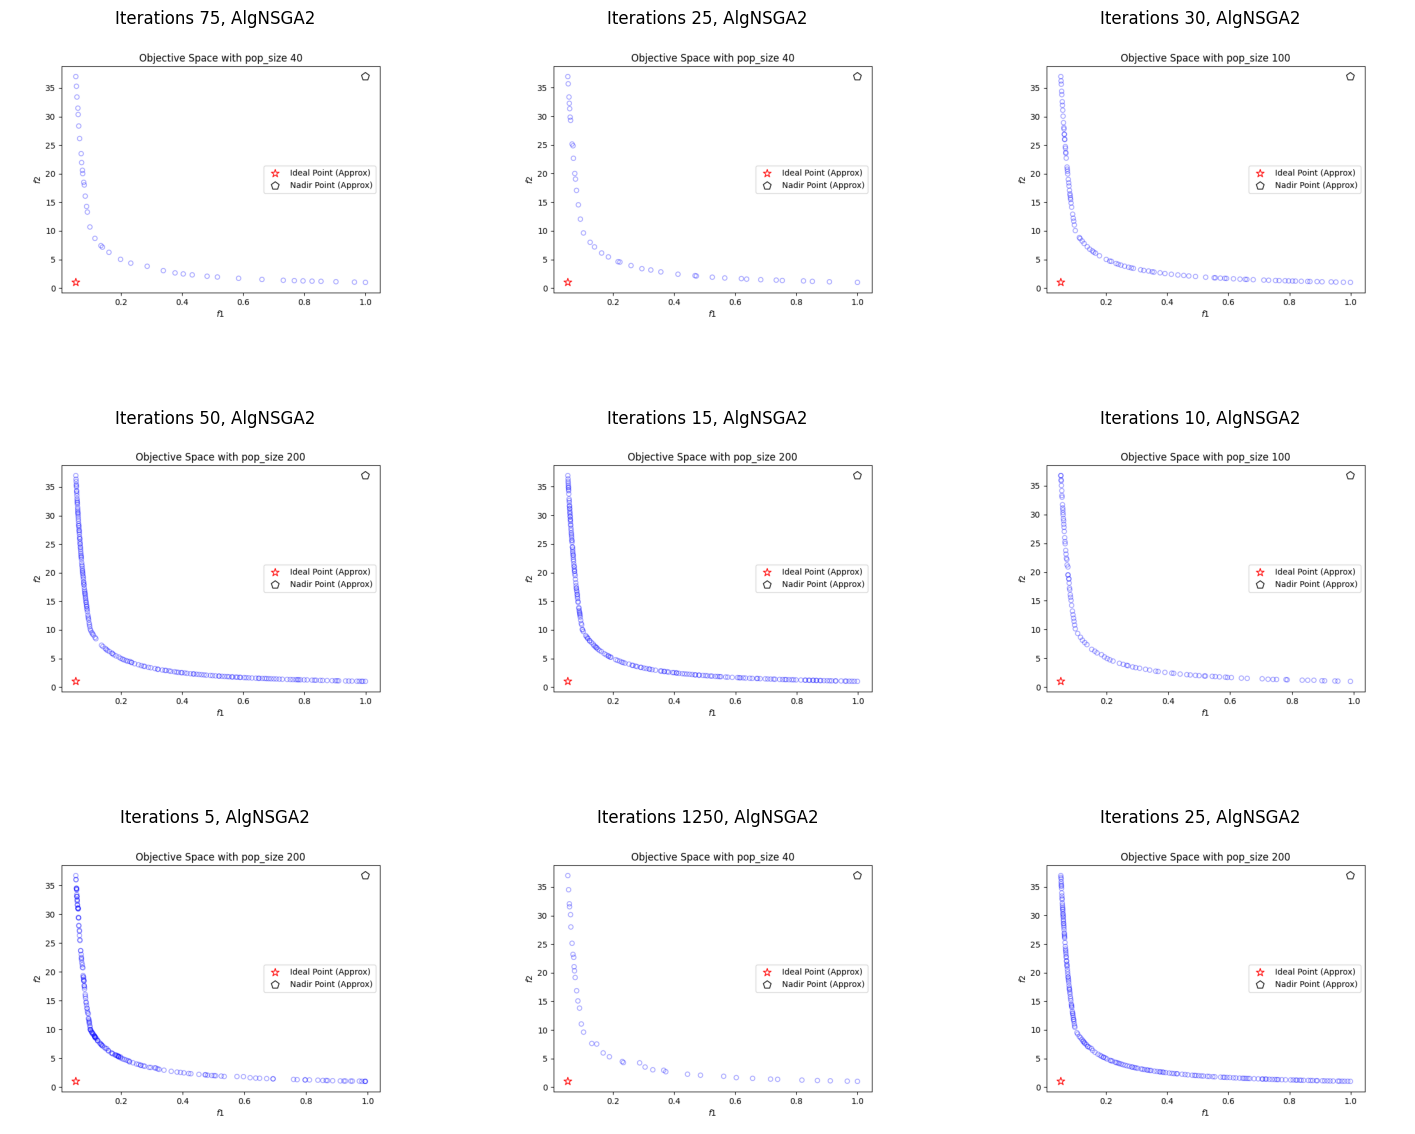

In [57]:
# more figures can be found here: Result/Images/VU1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = vu1['image_location'][i]
    path = os.path.join(folder_2,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {vu1.Iteration[i]}, Alg{vu1.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [58]:

nadir_arr  = np.array([np.fromstring(i[1:-1],dtype=float, sep=' ') for i in np.array(vu1['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([1  ,37])
pf = np.loadtxt(os.path.join(cdir, 'Bench/vu1_pf' ))
vu1_table =  hv_result(vu1)

Global nadir point for kur1 with two variables is :[ 1. 37.]
ref_point is [ 1 37]


## vu1 (5,5)

In [59]:
ref_point = np.array([5  ,5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/vu1_pf' ))
vu1_table_2 =  hv_result(vu1)

ref_point is [5 5]


## Vu1: (5,35)

In [60]:
pd.concat([vu1_table,vu1_table_2]).to_excel('Excel/vu1.xlsx', engine = 'xlsxwriter')

# VU2 

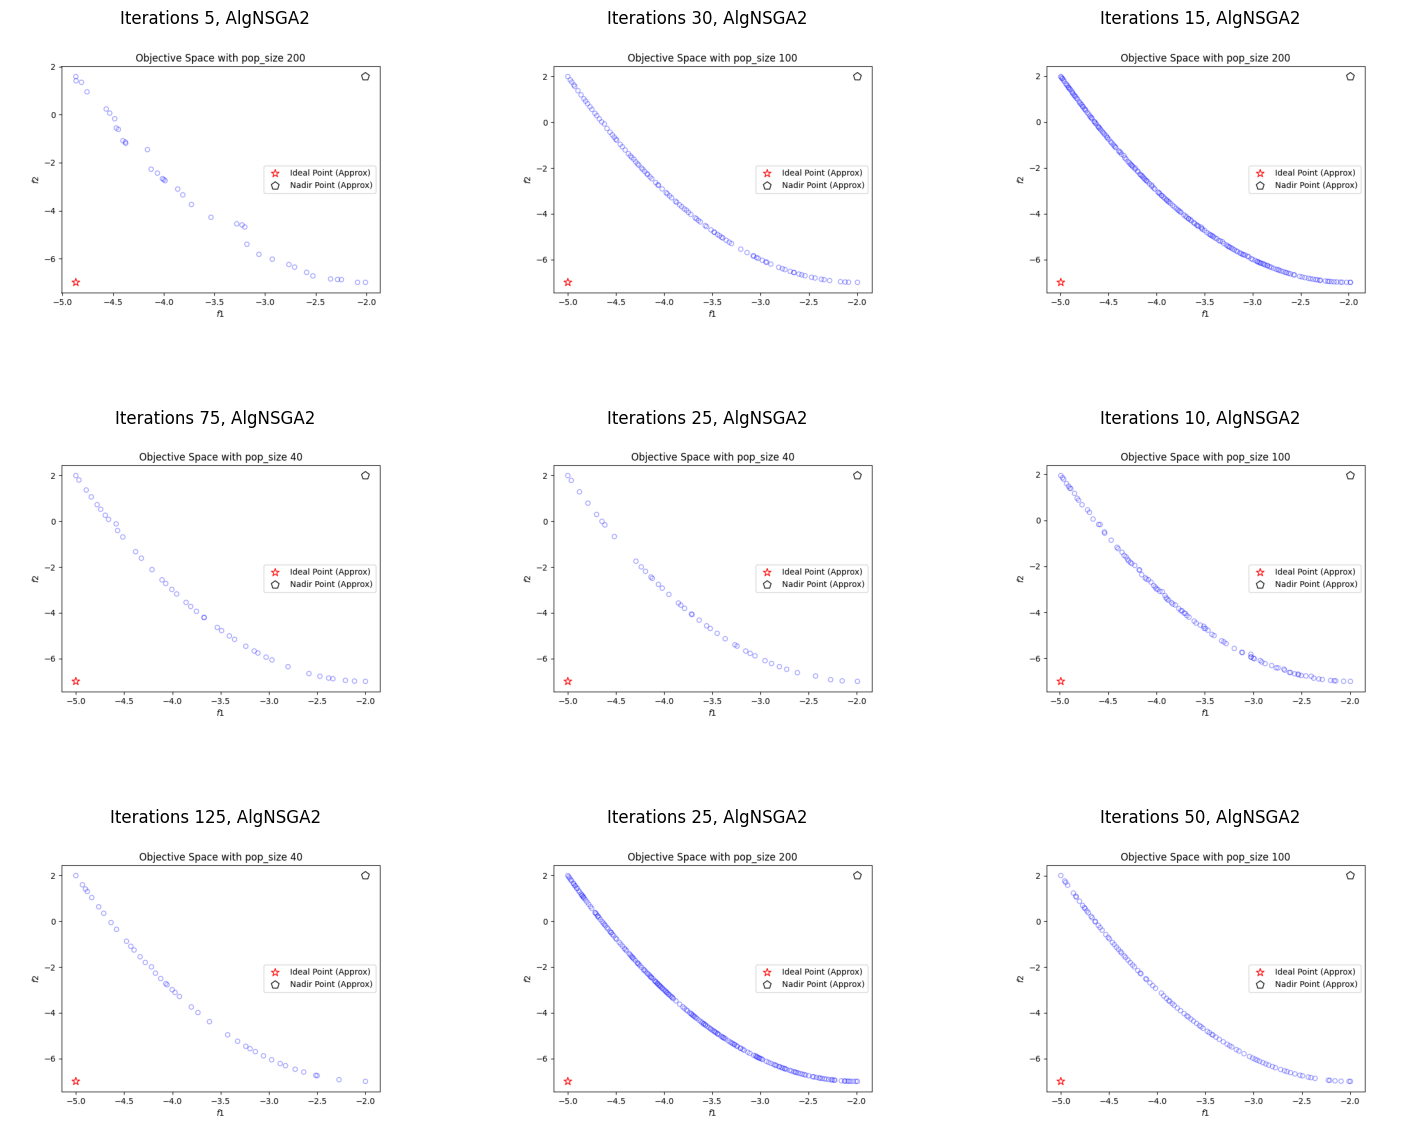

In [61]:
# more figures can be found here: Result/Images/VU2/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = vu2['image_location'][i]
    path = os.path.join(folder_2,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {vu2.Iteration[i]}, Alg{vu2.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [62]:

nadir_arr  = np.array([np.fromstring(i[1:-1], dtype=float, sep=' ') for i in np.array(vu2['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([-2,2.  ])
pf = np.loadtxt(os.path.join(cdir, 'Bench/vu2_pf' ))
vu2_table_1 = hv_result(vu2)

Global nadir point for kur1 with two variables is :[-1.81  2.06]
ref_point is [-2.  2.]


In [63]:
ref_point = np.array([5, 5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/vu2_pf' ))
vu2_table_2 = hv_result(vu2)

ref_point is [5 5]


In [64]:
pd.concat([vu2_table_1,vu2_table_2]).to_excel('Excel/vu2.xlsx', engine = 'xlsxwriter')